## NLP
  natural language processing
  
  It converts text data to numerical data

# 1. Get data

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore') # ignore the warnings
%matplotlib inline

In [206]:
data = pd.read_csv('spam.csv', encoding='latin')

In [207]:
data.head() # v1 column is the target column

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [209]:
data.loc[95]

v1                                                         spam
v2            Your free ringtone is waiting to be collected....
Unnamed: 2                                          PO Box 5249
Unnamed: 3                                 MK17 92H. 450Ppw 16"
Unnamed: 4                                                  NaN
Name: 95, dtype: object

In [210]:
data['Unnamed: 2'].dropna()

95                                            PO Box 5249
281      the person is definitely special for u..... B...
444      HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...
671      wanted to say hi. HI!!!\" Stop? Send STOP to ...
710       this wont even start........ Datz confidence.."
899                                           PO Box 5249
1038                                                   GN
1127                                             .;-):-D"
1266    just been in bedbut mite go 2 thepub l8tr if u...
1384     bt not his girlfrnd... G o o d n i g h t . . .@"
1428                                        I'll come up"
1559     don't miss ur best life for anything... Gud n...
1637     just as a shop has to give a guarantee on wha...
1669     But at d end my love compromised me for every...
1675     the toughest is acting Happy with all unspoke...
1936                                  smoke hella weed\""
1937                       \" not \"what i need to do.\""
1997    JUST G

In [211]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [212]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [213]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# 2.Preprocess Data

In [214]:
data['v2'].unique()

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [215]:
data['v2'].value_counts()

Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
Okie                                                                                                                                                                    4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                                      

In [216]:
data['v2'].value_counts().shape # It means 5169 messages are unique.

(5169,)

In [217]:
data.shape # Total number of messages

(5572, 2)




`Data Imbalance Problem`
  
     One category is having 90% values while other is having 10% values
     
     SMOTE

In [218]:
data['v1'].value_counts() # Here there is data imbalance

ham     4825
spam     747
Name: v1, dtype: int64

In [219]:
747 / data.shape[0]

0.13406317300789664

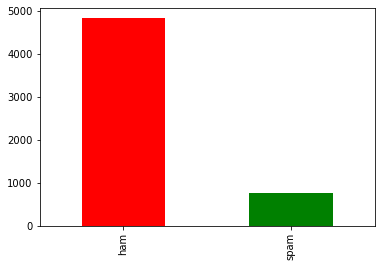

In [220]:
data['v1'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.show()

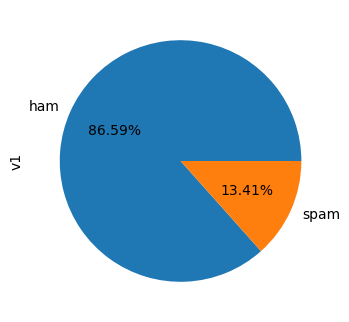

In [221]:
plt.figure(dpi=100)
((data['v1'].value_counts() / data.shape[0])*100).plot(kind='pie', autopct="%0.2f%%")
plt.show()


### NLP

    preprocessing of text

In [222]:
import nltk  # NLP library to process text data into numerical data
import re

In [224]:
 data.columns = ['label', 'message']

In [225]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [226]:
s = "hello !@$#%^&* how 1243 a$#re y(*$())ou"

In [227]:
expr = re.compile(r"[^0-9A-Za-z]")

re.sub(expr, '',s)

'hellohow1243areyou'



case should be same -> lowercase
   
   punctuation, spaces, newline characters -> remove
   
   

In [228]:
data.dtypes

label      object
message    object
dtype: object

In [229]:
data['message'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [230]:
s = "hello         how      \t       are    you.  "
expr = re.compile(r"\s+") # \s-> space class -> ' ', '\t', '\n'
re.sub(expr, ' ', s)

'hello how are you. '

In [231]:
stopwords = nltk.corpus.stopwords.words('english') + ['u','2',] #custom stop words
#built in stop words

s="hello i am doing nothing i will you will fine"

[word for word in s.split() if word not in stopwords]
" ".join([word for word in s.split() if word not in stopwords])

'hello nothing fine'

  `Part of speech`

In [232]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize

ps = PorterStemmer()

example_words = ["python","pythoner","pythoning","pythoned","pythonly"]

In [233]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize

In [234]:
def process_string(message):
    ps = PorterStemmer()
    stopwords = nltk.corpus.stopwords.words('english')
    message = message.lower()
    expr = re.compile(r'[^0-9A-Za-z]') # convert text data into lower case
    message = re.sub(expr, ' ', message) # remove 
    message = re.sub(r"\s+", ' ', message) # remove spaces
    stopwords = nltk.corpus.stopwords.words('english') + ['u','2','ur','4','r'] #custom stop words
    #built in stop words
    message= " ".join([ps.stem(word) for word in message.split() if word not in stopwords])
    return message

In [51]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [235]:
nltk.corpus.stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [236]:
data['message'] = data['message'].apply(process_string)

In [237]:
data.head()

,label,message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif oni
2,spam,free entri wkli comp win fa cup final tkt 21st...
3,ham,dun say earli hor c alreadi say
4,ham,nah think goe usf live around though


In [238]:
data.groupby('label').count()

,message
label,
ham,4825
spam,747


#### To visualize text data we can draw a word cloud

In [239]:
ham_messages = data['label'] == 'ham'
ham_messages.head()

0     True
1     True
2    False
3     True
4     True
Name: label, dtype: bool

In [240]:
ham_messages.head()

0     True
1     True
2    False
3     True
4     True
Name: label, dtype: bool

In [241]:
wd = pd.Series(" ".join(data['message']).split())

You can make a word frequency table

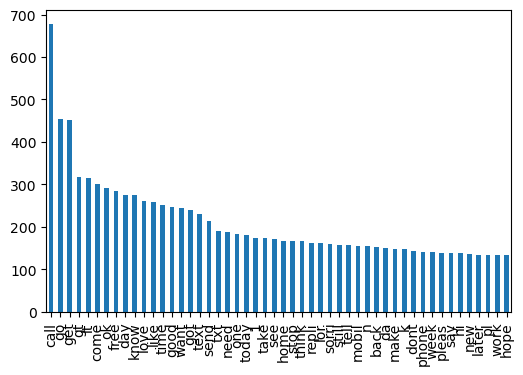

In [242]:
plt.figure(dpi=100)
wd.value_counts()[:50].plot(kind='bar')
plt.show()
#

In [134]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [244]:
from wordcloud import WordCloud
def plot_img(img):
    plt.figure(dpi=200)
    plt.imshow(img)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

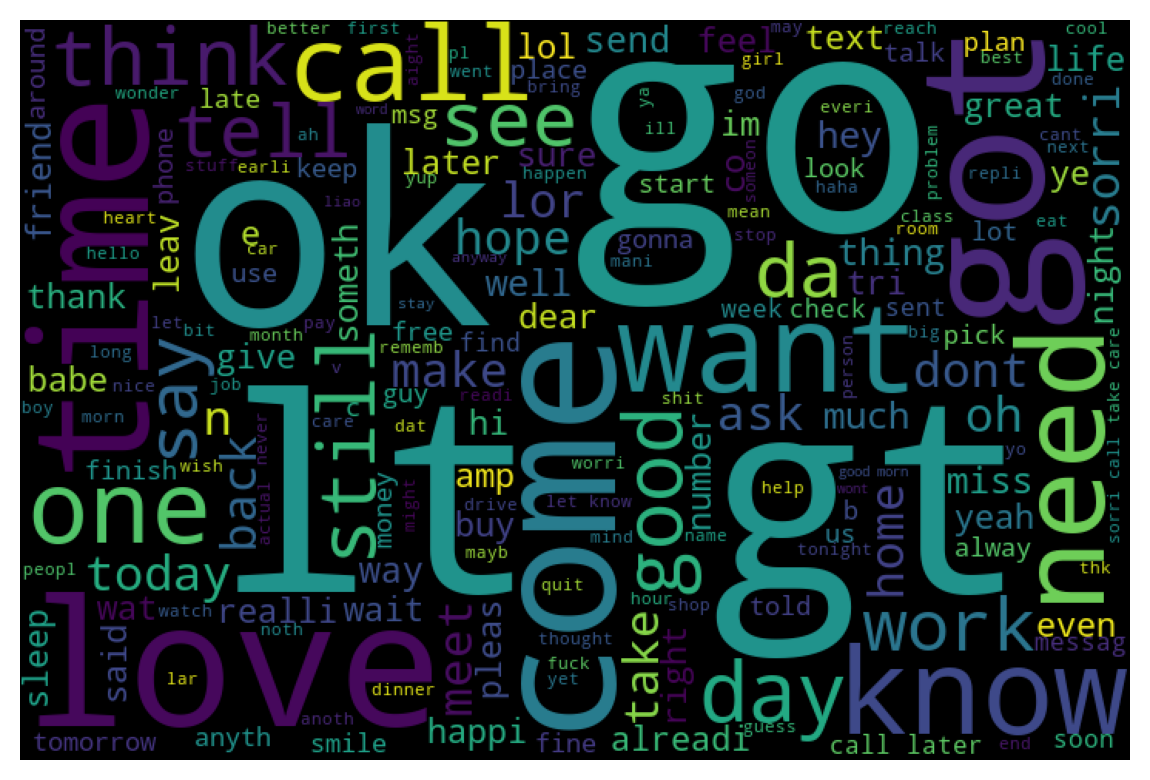

In [245]:
ham_messages = " ".join(data[data['label'] == 'ham']['message'])

ham_wordcloud = WordCloud(width=720, height=480).generate(ham_messages)
plot_img(ham_wordcloud)

#ham_messages

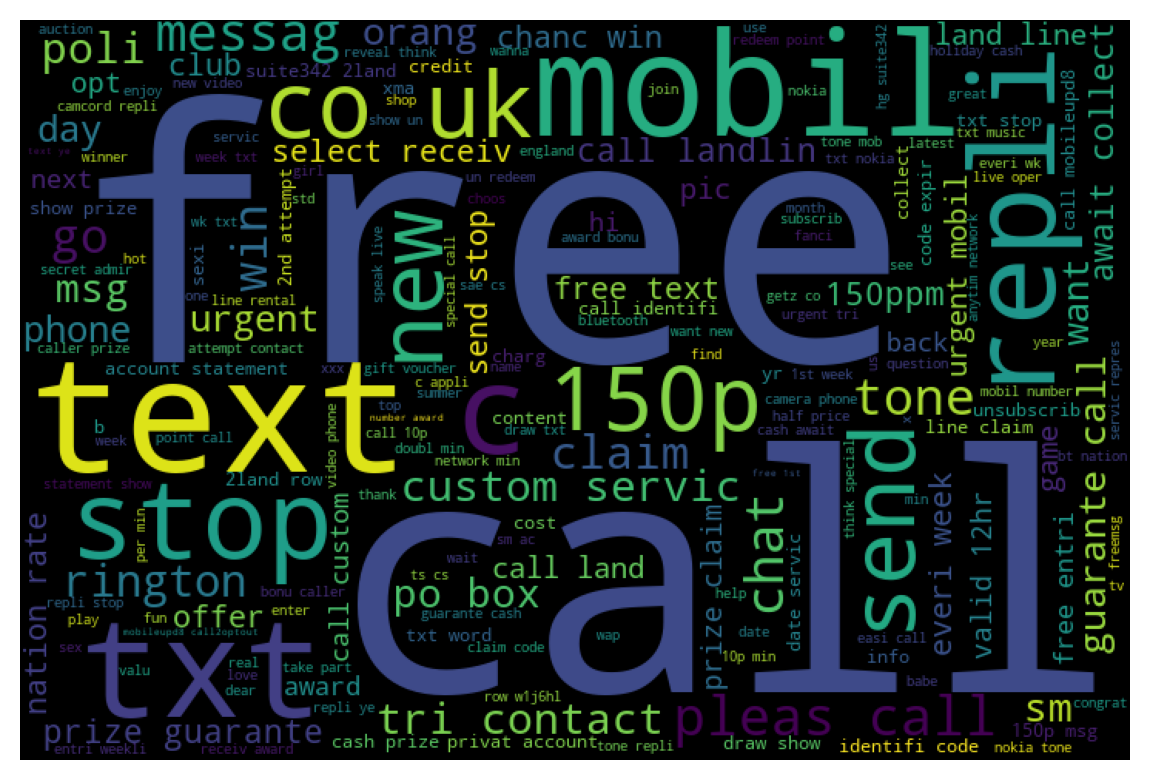

In [191]:
spam_messages = " ".join(data[data['label'] == 'spam']['message'])

spam_wordcloud = WordCloud(width=720, height=480).generate(spam_messages)
plot_img(spam_wordcloud)

#ham_messages

#### SnowballStemmer

#### Convert text into Vector

   Create a vector of TF / IDF

TF -> Term Frequency of a word in a sentence or message

IDF -> Inverse Document Frequency
 
       inverse frequency of a word in whole document

     vocab -> All unique words in corpus

one hot encoding / vectorization

In [250]:
corpus = [
    'hello this is awesome',
    'hi hello good',
    'hello is this fine',
    'hello is fine',
    'hello world python awesome'
]

In [261]:
def gen_vocab(corpus):
    vocab = [ ]

    for string in corpus:
        for word in string.split():
            if word not in vocab:
                vocab.append(word)
    
    vocab.sort() 
    return vocab

def create_vector(corpus):
    vocab = gen_vocab(corpus)
    vocab_dict = { key:0 for key in vocab}
    print(vocab)
    vectors = []
    for string in corpus:
        vector = [ 0 ] *len(vocab)
        for word in words:
            i = vocab.index(word)
            vector[i] += i
        vectors.append(vector)
        vocab_dict[word] += 1
    return vectors

output = create_vector(corpus)

['awesome', 'fine', 'good', 'hello', 'hi', 'is', 'python', 'this', 'world']


ValueError: 'Programmers' is not in list

    1. 'hello this is awesome'

    ['awesome', 'fine', 'good', 'hello', 'hi', 'is', 'python', 'this', 'world']
    
    [    1,      0,       0,      1,      0,    1,      0,        1,      0,  ]

In [254]:
output

NameError: name 'output' is not defined

In [255]:
from sklearn.feature_extraction.text import CountVectorizer

In [256]:
corpus = [
    'hello this is awesome',
    'hi hello good',
    'hello is this fine',
    'hello is fine',
    'hello world python awesome'
]

In [257]:
vector = CountVectorizer()

In [258]:
vector.fit(corpus)

CountVectorizer()

In [260]:
# ['awesome', 'fine', 'good', 'hello', 'hi', 'is', 'python', 'this', 'world']
#     0,        1,       2,      3,     4,    5,       6,      7,       8
vector.vocabulary_

{'hello': 3,
 'this': 7,
 'is': 5,
 'awesome': 0,
 'hi': 4,
 'good': 2,
 'fine': 1,
 'world': 8,
 'python': 6}

In [262]:
tr_vector = vector.transform(corpus)

In [263]:
tr_vector

<5x9 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [264]:
tr_vector.toarray()

array([[1, 0, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [265]:
output

NameError: name 'output' is not defined

#### Convert text into vector

In [266]:
from sklearn.feature_extraction.text import CountVectorizer

In [267]:
vector = CountVectorizer()

In [268]:
data.head()

,label,message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif oni
2,spam,free entri wkli comp win fa cup final tkt 21st...
3,ham,dun say earli hor c alreadi say
4,ham,nah think goe usf live around though


In [269]:
x = data[['message']]
x.head()

,message
0,go jurong point crazi avail bugi n great world...
1,ok lar joke wif oni
2,free entri wkli comp win fa cup final tkt 21st...
3,dun say earli hor c alreadi say
4,nah think goe usf live around though


In [270]:
y = data['label']

In [271]:
from sklearn.model_selection import train_test_split

In [275]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()
x_tr = vector.fit_transform(x['message'])

In [276]:
x_tr

<5572x7162 sparse matrix of type '<class 'numpy.int64'>'
	with 46449 stored elements in Compressed Sparse Row format>

In [278]:
vector.vocabulary_

{'go': 3024,
 'jurong': 3682,
 'point': 4976,
 'crazi': 2036,
 'avail': 1214,
 'bugi': 1593,
 'great': 3102,
 'world': 7013,
 'la': 3790,
 'buffet': 1591,
 'cine': 1826,
 'got': 3064,
 'amor': 1027,
 'wat': 6839,
 'ok': 4635,
 'lar': 3821,
 'joke': 3649,
 'wif': 6936,
 'oni': 4660,
 'free': 2863,
 'entri': 2534,
 'wkli': 6979,
 'comp': 1923,
 'win': 6947,
 'fa': 2653,
 'cup': 2086,
 'final': 2749,
 'tkt': 6409,
 '21st': 410,
 'may': 4149,
 '2005': 401,
 'text': 6297,
 '87121': 780,
 'receiv': 5274,
 'question': 5191,
 'std': 5998,
 'txt': 6567,
 'rate': 5236,
 'appli': 1099,
 '08452810075over18': 77,
 'dun': 2414,
 'say': 5521,
 'earli': 2430,
 'hor': 3333,
 'alreadi': 1001,
 'nah': 4401,
 'think': 6345,
 'goe': 3030,
 'usf': 6685,
 'live': 3931,
 'around': 1137,
 'though': 6360,
 'freemsg': 2870,
 'hey': 3264,
 'darl': 2134,
 'week': 6873,
 'word': 7007,
 'back': 1255,
 'like': 3901,
 'fun': 2912,
 'still': 6019,
 'tb': 6244,
 'xxx': 7072,
 'chg': 1784,
 'send': 5590,
 '50': 604,
 'rc

In [281]:
x_tr.shape #numerical features
# we have total 7113 unique words

(5572, 7162)

In [282]:
x_train, x_test, y_train, y_test = train_test_split(x_tr,y)

In [284]:
from sklearn.svm import SVC

In [285]:
svm_clf = SVC()

In [286]:
svm_clf.fit(x_train, y_train)

SVC()

In [287]:
y_hat = svm_clf.predict(x_test)

In [289]:
from sklearn.metrics import classification_report, confusion_matrix

In [290]:
print(confusion_matrix(y_test, y_hat))

[[1213    1]
 [  33  146]]


In [292]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1214
        spam       0.99      0.82      0.90       179

    accuracy                           0.98      1393
   macro avg       0.98      0.91      0.94      1393
weighted avg       0.98      0.98      0.97      1393



#### Train different models of classification

    SGDCClassifier
    KNN Classifier
    RandomForest Classifier
    Decision Tree Classifier
    Navie Bays Classifier
    SVC Classifier
    
    
#### hyper tune your SVM model or if possible other also to get best accuracy overall